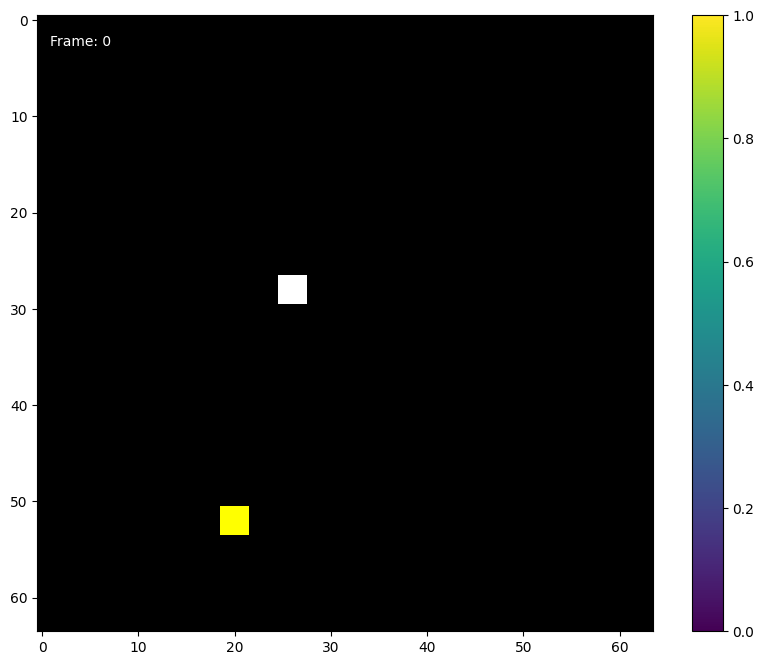

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import ipywidgets as widgets
import glob
import os

def create_interactive_animation(directory_path):
    # Get all numpy files in the directory
    files = sorted(glob.glob(os.path.join(directory_path, '*.npy')))
    
    if not files:
        raise ValueError("No .npy files found in the specified directory")
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Load and display first image
    image = np.load(files[0])
    image = np.transpose(image, (1, 2, 0))
    img_display = ax.imshow(image)
    plt.colorbar(img_display)
    
    # Frame counter text
    frame_text = ax.text(0.02, 0.95, 'Frame: 0', transform=ax.transAxes, color='white')
    
    # Create widgets
    play_button = widgets.Play(
        value=0,
        min=0,
        max=len(files)-1,
        step=1,
        description="Play",
        interval=100
    )
    
    slider = widgets.IntSlider(
        value=0,
        min=0,
        max=len(files)-1,
        step=1,
        description='Frame:',
        continuous_update=False
    )
    
    # Link play button to slider
    widgets.jslink((play_button, 'value'), (slider, 'value'))
    
    def update(change):
        # Get the current frame number
        frame = change['new']
        
        # Load and display the image
        image = np.load(files[frame])
        image = np.transpose(image, (1, 2, 0))
        img_display.set_array(image)
        
        # Update frame counter
        frame_text.set_text(f'Frame: {frame}/{len(files)-1}')
        
        # Update display
        fig.canvas.draw_idle()
    
    # Connect the slider to the update function
    slider.observe(update, names='value')
    
    # Display widgets and plot
    controls = widgets.HBox([play_button, slider])
    display(controls)
    plt.show()

# Usage example
directory_path = "/home/rahm/TEST/IMG"
create_interactive_animation(directory_path)